In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [2]:
torch.set_num_threads(1)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
eps = 1e-10

cwd = os.getcwd()

In [8]:
init_methods = ['rss', 'rss_random', 'randn_eye', 'unit', 'canonical']
embeddings = ['poly', 'unit']
renormalizes = [False]
bond_dims = [5]
n_epochs = [100]

batch_size = 128
n_points = 250

results_dir = os.path.join(cwd, '..', '..', 'results', '5_initialization_old')

In [9]:
all_logs_poly = {}
for im in init_methods:
    for r in renormalizes:
        for bd in bond_dims:
            for ne in n_epochs:
                model_name = f'{im}_poly_{r}_{bd}_{ne}.pt'
                model_dir = os.path.join(results_dir, model_name)
                if os.path.exists(model_dir):
                    logs, cores = torch.load(model_dir, weights_only=False)
                    aux_logs = logs['train_accs'][:(batch_size * n_points)]
                    
                    train_accs = []
                    for i in range(n_points):
                        mean_acc = sum(aux_logs\
                            [(i * batch_size):((i+1) * batch_size)]) / batch_size
                        train_accs.append(100*mean_acc)
                    
                    all_logs_poly[model_name] = train_accs

In [10]:
all_logs_unit = {}
for im in init_methods:
    for r in renormalizes:
        for bd in bond_dims:
            for ne in n_epochs:
                model_name = f'{im}_unit_{r}_{bd}_{ne}.pt'
                model_dir = os.path.join(results_dir, model_name)
                if os.path.exists(model_dir):
                    logs, cores = torch.load(model_dir, weights_only=False)
                    aux_logs = logs['train_accs'][:(batch_size * n_points)]
                    
                    train_accs = []
                    for i in range(n_points):
                        mean_acc = sum(aux_logs\
                            [(i * batch_size):((i+1) * batch_size)]) / batch_size
                        train_accs.append(100*mean_acc)
                    
                    all_logs_unit[model_name] = train_accs

In [11]:
all_logs_fourier = {}
for im in init_methods:
    for r in renormalizes:
        for bd in bond_dims:
            for ne in n_epochs:
                model_name = f'{im}_fourier_{r}_{bd}_{ne}.pt'
                model_dir = os.path.join(results_dir, model_name)
                if os.path.exists(model_dir):
                    logs, cores = torch.load(model_dir, weights_only=False)
                    aux_logs = logs['train_accs'][:(batch_size * n_points)]
                    
                    train_accs = []
                    for i in range(n_points):
                        mean_acc = sum(aux_logs\
                            [(i * batch_size):((i+1) * batch_size)]) / batch_size
                        train_accs.append(100*mean_acc)
                    
                    all_logs_fourier[model_name] = train_accs

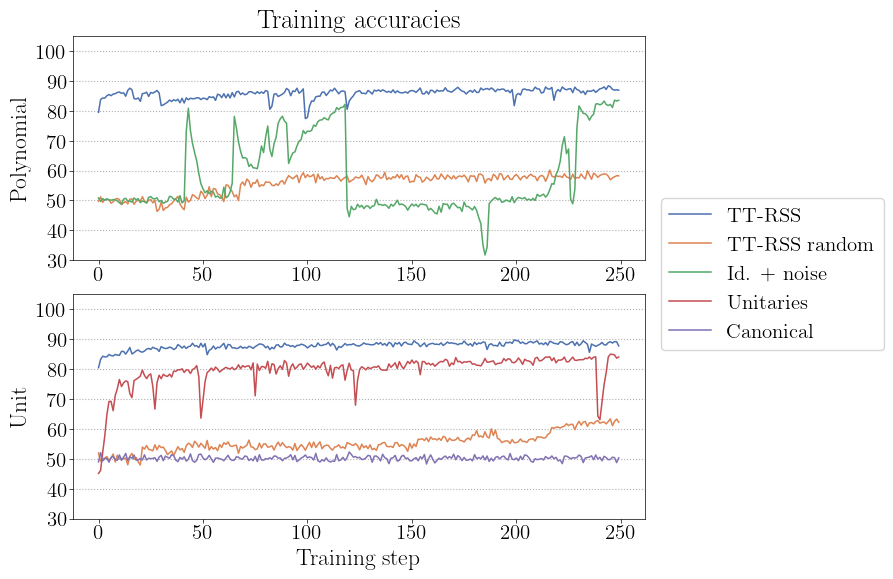

In [23]:
palette = sns.color_palette("deep")
colors = palette[0], palette[1], palette[2], palette[3], palette[4]

plt.rc('font', family='serif', serif='Computer Modern', size=16)
plt.rc('text', usetex=True)


# Set global font sizes
plt.rcParams['axes.linewidth'] = 0.5  # Default is usually 1.0
plt.rcParams['axes.titlesize'] = 19  # Title font size
plt.rcParams['axes.labelsize'] = 17  # Axis label font size
plt.rcParams['xtick.labelsize'] = 15  # X-axis tick label font size
plt.rcParams['ytick.labelsize'] = 15  # Y-axis tick label font size
plt.rcParams['legend.fontsize'] = 15


labels = {'randn_eye': 'Id. + noise',
          'rss_random': 'TT-RSS random',
          'rss': 'TT-RSS',
          'unit': 'Unitaries',
          'canonical': 'Canonical'}
titles = {'unit': 'Unit',
          'poly': 'Polynomial'}

fig, axs = plt.subplots(2, 1, figsize=(6.5, 5.75))

for i, emb in enumerate(embeddings):
    all_logs = {}
    for j, im in enumerate(init_methods):
        for r in renormalizes:
            for bd in bond_dims:
                for ne in n_epochs:
                    model_name = f'{im}_{emb}_{r}_{bd}_{ne}.pt'
                    model_dir = os.path.join(results_dir, model_name)
                    if os.path.exists(model_dir):
                        logs, cores = torch.load(model_dir, weights_only=False)
                        aux_logs = logs['train_accs'][:(batch_size * n_points)]
                        
                        train_accs = []
                        for k in range(n_points):
                            mean_acc = sum(aux_logs\
                                [(k * batch_size):((k+1) * batch_size)]) / batch_size
                            train_accs.append(100*mean_acc)
                        
                        all_logs[model_name] = train_accs
    
                        
                        x = torch.arange(len(train_accs))
                        axs[i].plot(x, train_accs, linewidth=1.1,
                                    label=labels[im], color=colors[j])
    
    axs[i].set_ylabel(f'{titles[emb]}')
    
    axs[i].yaxis.grid(linestyle=':')
    axs[i].set_ylim(100*0.3, 100*1.05)
    axs[i].set_yticks(torch.arange(100*0.3, 100*1.05, 10))

axs[0].set_title('Training accuracies')
axs[1].set_xlabel('Training step')

lines_labels = [ax.get_legend_handles_labels() for ax in axs]
lines_labels[1] = ([lines_labels[1][0][2],
                    lines_labels[1][0][3]],
                   [lines_labels[1][1][2],
                    lines_labels[1][1][3]])
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='lower left', bbox_to_anchor=(1., 0.38))


plt.tight_layout(pad=0.25)


for i in range(2):
    axs[i].tick_params(axis='both', which='major', pad=1,
                       direction='out', length=3, width=0.5)  # Default is usually around 6-10
    axs[i].tick_params(axis='both', which='minor', pad=1,
                       direction='out', length=3, width=0.5)


results_dir = os.path.join(cwd, '..', '..', 'results', '5_initialization_old')
plt.savefig(os.path.join(results_dir, 'initialization.pdf'), bbox_inches='tight')

plt.show()

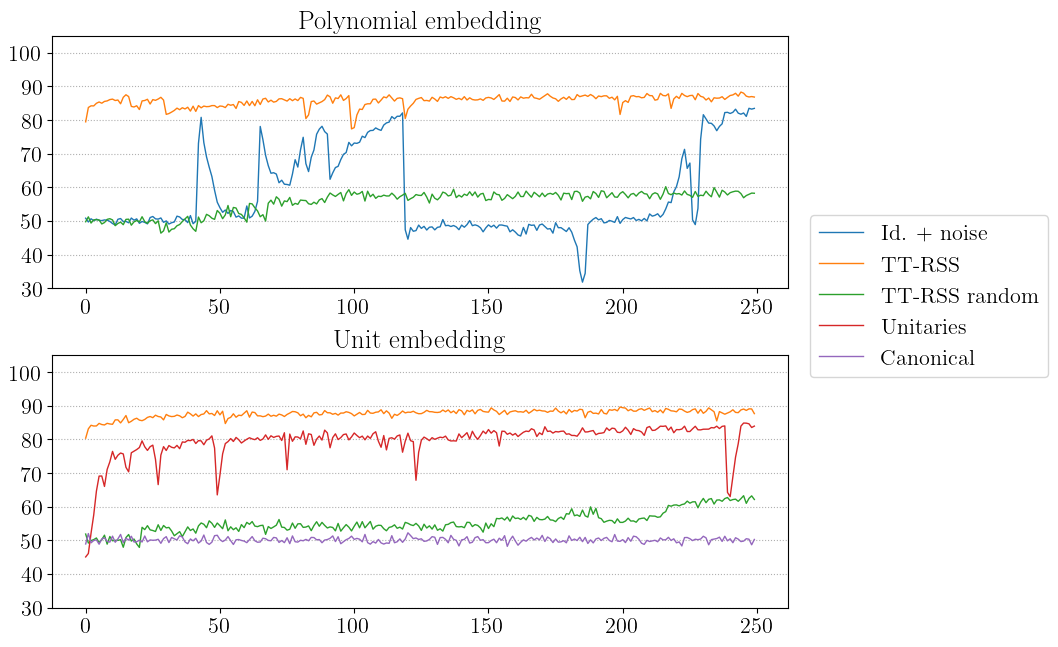

In [ ]:
# plt.rc('font', family='serif', size=15)
plt.rc('font', family='serif', serif='Computer Modern', size=16)
plt.rc('text', usetex=True)

colormap = plt.get_cmap("tab10")
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
labels = {'randn_eye': 'Id. + noise',
          'rss_random': 'TT-RSS random',
          'rss': 'TT-RSS',
          'unit': 'Unitaries',
          'canonical': 'Canonical'}
titles = {'unit': 'Unit',
          'poly': 'Polynomial'}

fig, axs = plt.subplots(2, 1, figsize=(8, 6.5))

for i, emb in enumerate(embeddings):
    all_logs = {}
    for j, im in enumerate(init_methods):
        for r in renormalizes:
            for bd in bond_dims:
                for ne in n_epochs:
                    model_name = f'{im}_{emb}_{r}_{bd}_{ne}.pt'
                    model_dir = os.path.join(results_dir, model_name)
                    if os.path.exists(model_dir):
                        logs, cores = torch.load(model_dir, weights_only=False)
                        aux_logs = logs['train_accs'][:(batch_size * n_points)]
                        
                        train_accs = []
                        for k in range(n_points):
                            mean_acc = sum(aux_logs\
                                [(k * batch_size):((k+1) * batch_size)]) / batch_size
                            train_accs.append(100*mean_acc)
                        
                        all_logs[model_name] = train_accs
    
                        
                        x = torch.arange(len(train_accs))
                        axs[i].plot(x, train_accs, linewidth=1.,
                                    label=labels[im], color=colors[j])
    
    axs[i].set_title(f'{titles[emb]} embedding')
    
    axs[i].yaxis.grid(linestyle=':')
    axs[i].set_ylim(100*0.3, 100*1.05)
    axs[i].set_yticks(torch.arange(100*0.3, 100*1.05, 10))

lines_labels = [ax.get_legend_handles_labels() for ax in axs]
lines_labels[0] = ([lines_labels[0][0][0]], [lines_labels[0][1][0]])
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='lower left', bbox_to_anchor=(1., 0.4))

plt.tight_layout(pad=0.5)

results_dir = os.path.join(cwd, '..', '..', 'results', '5_initialization_old')
plt.savefig(os.path.join(results_dir, 'initialization.pdf'), bbox_inches='tight')

plt.show()

In [22]:
init_methods = ['rss_pretrain', 'rss_random']
embeddings = ['poly', 'unit', 'fourier']
renormalizes = [False]
bond_dims = [5]
n_epochs = [200]

batch_size = 64
n_points = 100

results_dir = os.path.join(cwd, '..', '..', 'results', '5_initialization')

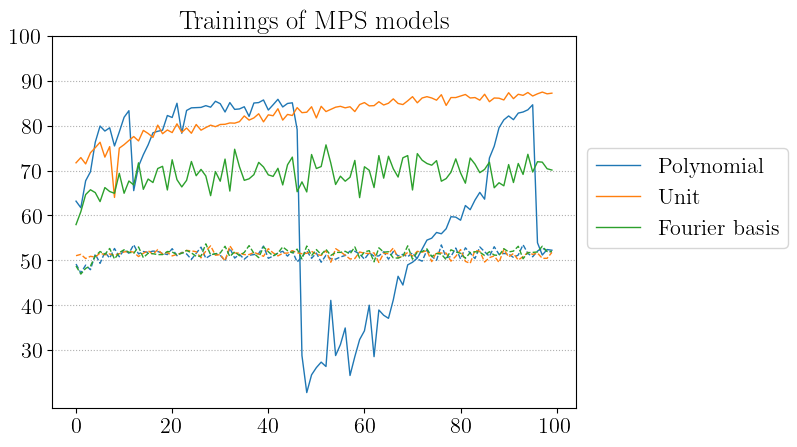

In [23]:
# plt.rc('font', family='serif', size=15)
plt.rc('font', family='serif', serif='Computer Modern', size=16)
plt.rc('text', usetex=True)

colormap = plt.get_cmap("tab10")
colors = ['tab:blue', 'tab:orange', 'tab:green']
markers = ['o', 's', 'D']
labels = {'poly': 'Polynomial',
          'unit': 'Unit',
          'fourier': 'Fourier basis'}
linestyles = ['-', '--']

fig, axs = plt.subplots(1, 1, figsize=(8, 4.5))

for i, emb in enumerate(embeddings):
    all_logs = {}
    for j, im in enumerate(init_methods):
        for r in renormalizes:
            for bd in bond_dims:
                for ne in n_epochs:
                    model_name = f'{im}_{emb}_{r}_{bd}_{ne}'
                    model_name = list(filter(lambda f: f.startswith(model_name),
                                             os.listdir(results_dir)))[0]
                    model_dir = os.path.join(results_dir, model_name)
                    if os.path.exists(model_dir):
                        logs, cores = torch.load(model_dir, weights_only=False)
                        aux_logs = logs['train_accs'][:(batch_size * n_points)]
                        
                        train_accs = []
                        for k in range(n_points):
                            mean_acc = sum(aux_logs\
                                [(k * batch_size):((k+1) * batch_size)]) / batch_size
                            train_accs.append(100*mean_acc)
                        
                        all_logs[model_name] = train_accs
                        
                        x = torch.arange(len(train_accs))
                        
                        if j == 0:
                            axs.plot(x, train_accs, linewidth=1., color=colors[i],
                                     label=labels[emb], linestyle=linestyles[j])
                        else:
                            axs.plot(x, train_accs, linewidth=1., color=colors[i],
                                     linestyle=linestyles[j])
    
axs.set_title('Trainings of MPS models')

axs.yaxis.grid(linestyle=':')
# axs.set_ylim(100*0.3, 100*1.05)
axs.set_yticks(torch.arange(100*0.3, 100*1.05, 10))

axs.legend(loc='lower left', bbox_to_anchor=(1., 0.4))

# lines_labels = [ax.get_legend_handles_labels() for ax in axs]
# lines_labels[0] = ([lines_labels[0][0][0]], [lines_labels[0][1][0]])
# lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines, labels, loc='lower left', bbox_to_anchor=(1., 0.4))

plt.tight_layout(pad=0.5)

results_dir = os.path.join(cwd, '..', '..', 'results', '5_initialization')
plt.savefig(os.path.join(results_dir, 'initialization.pdf'), bbox_inches='tight')

plt.show()